# Nicolás Torres-Echeverry: 

# Homework 4 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including **Naïve Bayes**, **Logistic regression**, **K-nearest neighbor**, **decision trees and random forests**, **support vector machines** and even a **simple neural network**, the perceptron. We will also demonstrate **ensemble techniques that can link several such methods into a single, more accurate, classification pipeline**. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1: Contrasting Classification Methods*</span>

Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

# A. ***Using randomly created data***

In [2]:
noise2 = .3

dfTrain_1, dfTest_1 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain_2, dfTest_2 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise2))
dfTrain_3, dfTest_3 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2))
dfTrain_4, dfTest_4 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain_5, dfTest_5 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))

In [3]:
noise2 = .4

dfTrain_6, dfTest_6 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain_7, dfTest_7 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise2))
dfTrain_8, dfTest_8 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2))
dfTrain_9, dfTest_9 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain_10, dfTest_10 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))

In [4]:
# Only data created through multiblobs creates nonbinary categories

# train_data = [dfTrain_1, dfTrain_2, dfTrain_3, dfTrain_4, dfTrain_5, dfTrain_6,
#              dfTrain_7, dfTrain_8, dfTrain_9, dfTrain_10] 
             
# for data in train_data:
    # print(data['category'].describe())

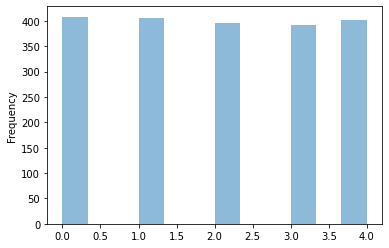

In [5]:
ax = dfTrain_10['category'].plot.hist(bins=12, alpha=0.5)

In [6]:
dfTrain_10.sample(5)

,vect,category
117,"[-10.05972420610183, 6.2263806414730825]",3
942,"[-11.553837487893201, 4.940015790051009]",3
1047,"[-9.984098830473943, 5.965177142645766]",3
624,"[-10.742189706114981, 3.8586312935298883]",3
556,"[-8.600647521624783, 6.052487645688053]",0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

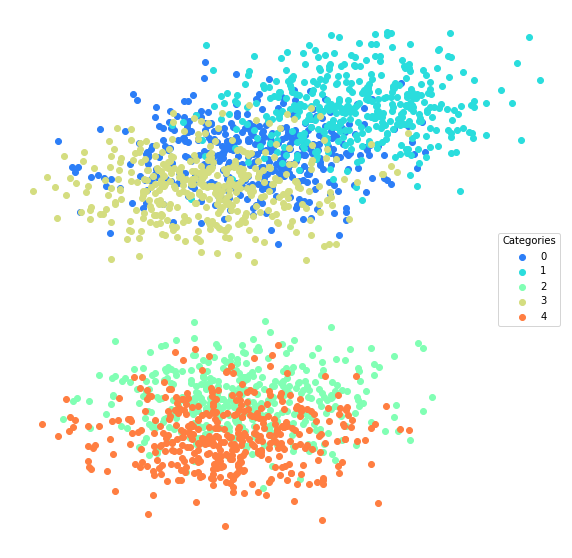

In [7]:
lucem_illud.plotter(dfTrain_10)

In [8]:
    #Bayes
clf_naive_bayes = sklearn.naive_bayes.GaussianNB()

    #Analogizes
clf_linear = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf_svc = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf_kneigh = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

    #Classical Regression - Logit Regression
clf_logit = sklearn.linear_model.LogisticRegression()

    #Symbolists
clf_dtree = sklearn.tree.DecisionTreeClassifier()
clf_randomf = sklearn.ensemble.RandomForestClassifier()

    #Connectionists
clf_neural = sklearn.neural_network.MLPClassifier()

    #Ensemble
clf_gradient = sklearn.ensemble.GradientBoostingClassifier()

In [9]:
    # Naive Bayes
clf_naive_bayes.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_naive_bayes, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.154,0.770940,0.571429,0.436671,0.652174
1,0.056,0.913060,0.845361,0.755680,0.863158
2,0.110,0.818505,0.760417,0.592671,0.695238
3,0.110,0.813874,0.787234,0.604452,0.678899
4,0.110,0.843938,0.703704,0.586217,0.767677


In [10]:
    # Analogizes
    # Linear
clf_linear.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_linear, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.144,0.772858,0.602041,0.452091,0.641304
1,0.056,0.917089,0.838384,0.756483,0.873684
2,0.108,0.819771,0.768421,0.598236,0.695238
3,0.104,0.830944,0.787879,0.625803,0.715596
4,0.108,0.848989,0.706422,0.593439,0.777778


In [11]:
    # SVC
clf_svc.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_svc, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.140,0.775309,0.614583,0.460135,0.641304
1,0.058,0.911826,0.836735,0.748234,0.863158
2,0.112,0.838216,0.724771,0.597304,0.752381
3,0.098,0.844705,0.794118,0.646124,0.743119
4,0.112,0.816066,0.726316,0.566220,0.696970


In [12]:
    # KNeighbors
clf_kneigh.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_kneigh, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.166,0.713075,0.551724,0.375856,0.521739
1,0.080,0.898246,0.752294,0.675348,0.863158
2,0.134,0.785835,0.693878,0.523368,0.647619
3,0.114,0.817933,0.760000,0.595908,0.697248
4,0.134,0.802350,0.650943,0.513688,0.696970


In [13]:
    # Symbolists
    # Decision Tree
clf_dtree.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_dtree, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.198,0.672421,0.462366,0.314106,0.467391
1,0.092,0.862638,0.742574,0.626243,0.789474
2,0.142,0.784268,0.663462,0.507989,0.657143
3,0.142,0.780180,0.686275,0.518727,0.642202
4,0.142,0.778345,0.640000,0.483737,0.646465


In [14]:
    # Random Forest
clf_randomf.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_randomf, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.154,0.737266,0.584270,0.410239,0.565217
1,0.074,0.910006,0.763636,0.697215,0.884211
2,0.112,0.817239,0.752577,0.587220,0.695238
3,0.116,0.810038,0.762887,0.587923,0.678899
4,0.112,0.838888,0.700935,0.579011,0.757576


In [15]:
    # Connectionists - Neural Network
clf_neural.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_neural, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.142,0.786711,0.601942,0.465656,0.673913
1,0.052,0.919558,0.855670,0.771585,0.873684
2,0.098,0.822604,0.818182,0.627039,0.685714
3,0.102,0.828914,0.802083,0.630609,0.706422
4,0.098,0.878045,0.715517,0.631878,0.838384


In [16]:
    # Ensemble - Gradient
clf_gradient.fit(np.stack(dfTrain_10['vect'], axis=0), dfTrain_10['category'])
lucem_illud.evaluateClassifier(clf_gradient, dfTest_10)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.160,0.733589,0.565217,0.399471,0.565217
1,0.062,0.917414,0.807692,0.736170,0.884211
2,0.100,0.831826,0.789474,0.623910,0.714286
3,0.114,0.817933,0.760000,0.595908,0.697248
4,0.100,0.861583,0.724771,0.618352,0.797980


# B. ***Using the Senate (five senators) data***

In [17]:
dfTrain_senate_large, dfTest_senate_large = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
dfTrain_senate_large.sample(5)

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


,category,filePath,text,tokenized_text,normalized_text,vect
2832,Kennedy,../data/grimmerPressReleases/Kennedy/08Sep2005...,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,"[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, RELE...","[immediate, release, immediate, release, conta...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3770,Kennedy,../data/grimmerPressReleases/Kennedy/16Mar2006...,FOR IMMEDIATE RELEASE It s ominous t...,"[FOR, IMMEDIATE, RELEASE, It, s, ominous, that...","[immediate, release, s, ominous, administratio...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2876,Kennedy,../data/grimmerPressReleases/Kennedy/12Sep2006...,FOR IMMEDIATE RELEASE Washington D ...,"[FOR, IMMEDIATE, RELEASE, Washington, D, C, Th...","[immediate, release, washington, have, c, depa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
699,Kyl,../data/grimmerPressReleases/Kyl/18Jan2006Kyl2...,SEN. KYL: ENACT TRAVEL BAN AND LOBBYING REFORM...,"[SEN, KYL, ENACT, TRAVEL, BAN, AND, LOBBYING, ...","[sen, kyl, enact, travel, ban, lobby, reform, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
292,Klobuchar,../data/grimmerPressReleases/Klobuchar/10Jun20...,...,"[Klobuchar, Pushes, for, Energy, Price, Relief...","[klobuchar, push, energy, price, relief, crack...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [18]:
    # Naive Bayes
clf_naive_bayes.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_naive_bayes, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.047436,0.771329,0.818182,0.490326,0.553846
Kennedy,0.247436,0.771468,0.653543,0.643504,0.951289
Kohl,0.071795,0.671901,0.966667,0.404243,0.345238
Kyl,0.066667,0.734694,1.000000,0.536054,0.469388
Kerry,0.151282,0.760122,0.717105,0.520961,0.592391


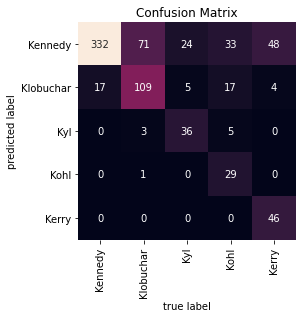

In [19]:
lucem_illud.plotConfusionMatrix(clf_naive_bayes, dfTest_senate_large)

In [20]:
    # Analogizes
    # Linear
clf_linear.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_linear, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.002564,0.984615,1.000000,0.971795,0.969231
Kennedy,0.030769,0.971885,0.938005,0.936600,0.997135
Kohl,0.007692,0.964286,1.000000,0.936264,0.928571
Kyl,0.001282,0.994898,1.000000,0.991078,0.989796
Kerry,0.019231,0.961118,0.994152,0.936459,0.923913


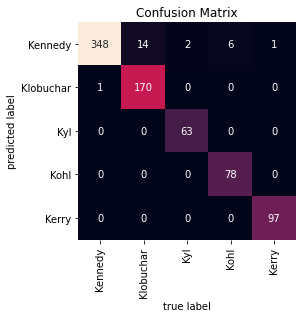

In [21]:
lucem_illud.plotConfusionMatrix(clf_linear, dfTest_senate_large)

In [22]:
    # SVC - Support Vector Classifier
clf_svc.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_svc, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.033333,0.800000,1.000000,0.633333,0.600000
Kennedy,0.246154,0.775627,0.648393,0.644938,0.982808
Kohl,0.060256,0.720238,1.000000,0.500733,0.440476
Kyl,0.066667,0.734694,1.000000,0.536054,0.469388
Kerry,0.121795,0.779417,0.844961,0.596702,0.592391


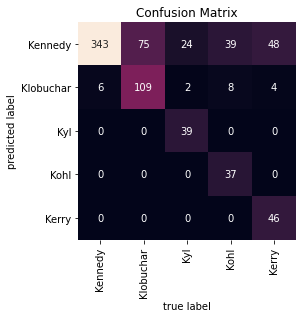

In [23]:
lucem_illud.plotConfusionMatrix(clf_svc, dfTest_senate_large)

In [24]:
    # KNeighbors
clf_kneigh.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_kneigh, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.025641,0.895105,0.881356,0.721751,0.800000
Kennedy,0.167949,0.843122,0.745495,0.730123,0.948424
Kohl,0.039744,0.831178,0.949153,0.668666,0.666667
Kyl,0.051282,0.830870,0.891892,0.641688,0.673469
Kerry,0.130769,0.781059,0.784722,0.572947,0.614130


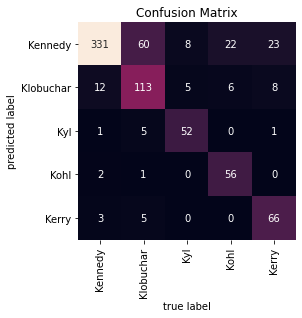

In [25]:
lucem_illud.plotConfusionMatrix(clf_kneigh, dfTest_senate_large)

In [26]:
    # Symbolists
    # Decision Tree
clf_dtree.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_dtree, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.001282,0.999301,0.984848,0.984848,1.000000
Kennedy,0.005128,0.995087,0.991453,0.989894,0.997135
Kohl,0.003846,0.982143,1.000000,0.968132,0.964286
Kyl,0.001282,0.999267,0.989899,0.989899,1.000000
Kerry,0.001282,0.997283,1.000000,0.995847,0.994565


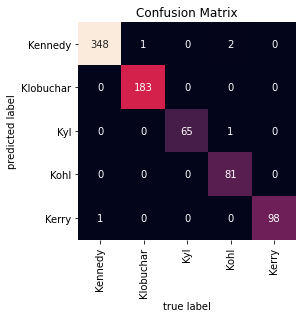

In [27]:
lucem_illud.plotConfusionMatrix(clf_dtree, dfTest_senate_large)

In [28]:
    # Random Forest
clf_randomf.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_randomf, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.005128,0.969231,1.000000,0.943590,0.938462
Kennedy,0.012821,0.988399,0.972145,0.972145,1.000000
Kohl,0.002564,0.988095,1.000000,0.978755,0.976190
Kyl,0.000000,1.000000,1.000000,1.000000,1.000000
Kerry,0.005128,0.989130,1.000000,0.983389,0.978261


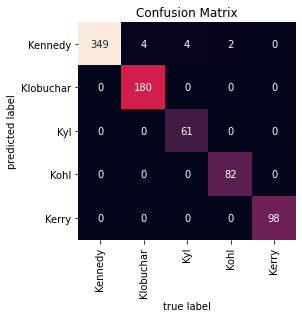

In [29]:
lucem_illud.plotConfusionMatrix(clf_randomf, dfTest_senate_large)

In [30]:
    # Connectionists - Neural Network
clf_neural.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_neural, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.003846,0.983916,0.984375,0.956651,0.969231
Kennedy,0.042308,0.960899,0.920213,0.916149,0.991404
Kohl,0.008974,0.963567,0.987342,0.924510,0.928571
Kyl,0.007692,0.973757,0.989362,0.945294,0.948980
Kerry,0.034615,0.936023,0.970060,0.882280,0.880435


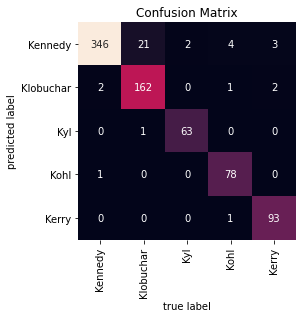

In [31]:
lucem_illud.plotConfusionMatrix(clf_neural, dfTest_senate_large)

In [32]:
    # Ensemble - Gradient
clf_gradient.fit(np.stack(dfTrain_senate_large['vect'], axis=0), dfTrain_senate_large['category'])
lucem_illud.evaluateClassifier(clf_gradient, dfTest_senate_large)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.000000,1.000000,1.000000,1.000000,1.000000
Kennedy,0.006410,0.994200,0.985876,0.985876,1.000000
Kohl,0.005128,0.976190,1.000000,0.957509,0.952381
Kyl,0.000000,1.000000,1.000000,1.000000,1.000000
Kerry,0.001282,0.997283,1.000000,0.995847,0.994565


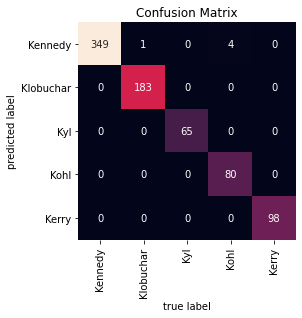

In [33]:
lucem_illud.plotConfusionMatrix(clf_gradient, dfTest_senate_large)

### Comments:
- Interestingly, the Naive Bayes does very well on the five categories randomly created, but very poorly on the five sennators.
- The Random Forest has the best predictive power. As the Confusion Matrix shows, it makes only one mistake in classifying the testing data.

## <span style="color:red">*Exercise 2: Logistic and Naïve Bayes classification*</span>

In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


#### Data

I will be using the data from the colombian candiadates' tweets. I will be employing a sample of 1000 tweets from three candidates that occupy different places in the political field: Gustavo Petro, Pacho Santos, and Gemán Vargas Lleras.

---------

### Helper functions for this section:


In [34]:
import re
import spacy

In [35]:

nlp = spacy.load("es_core_news_sm")
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [36]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [37]:
df_twitter = pandas.read_csv('clean_data.csv')

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,4,5,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
df_three_pol = df_twitter.loc[df_twitter['username'].isin(['Gustavo Petro', 
                                                            'Pacho Santos', 
                                                            'Germán Vargas Lleras'])]

In [39]:
df_three_pol = df_three_pol.sample(1000, random_state=987)

In [40]:
df_clean = df_three_pol[['username', 'text']]
df_clean = df_clean.rename(columns={"username": "category", "text": "text"})
df_clean.sample(5)

,category,text
9781,Gustavo Petro,@Fogonero86 me encantan los comentarios que la...
633387,Gustavo Petro,@TaverAndres y la industrialización de la prod...
75203,Germán Vargas Lleras,"Con los contratos suscritos hoy,completamos 62..."
358325,Gustavo Petro,@HELIODOPTERO a quien te refieres?
563673,Germán Vargas Lleras,Terminé la entrevista con Jorge Cura y ahora e...


In [41]:
# Some text cleaning using regular expressions

df_clean['text2'] = df_clean['text'].apply(lambda x: re.sub('[¡!@#$:).;,¿?&]', '', x.lower()))
df_clean['tokenized_text'] = df_clean['text2'].apply(lambda x: word_tokenize(x))
df_clean['normalized_text'] = df_clean['tokenized_text'].apply(lambda x: normalizeTokens(x))
df_clean.sample(5)

,category,text,text2,tokenized_text,normalized_text
73110,Germán Vargas Lleras,1/4 Reitero lo que el ministro @CarlosHolmesTr...,1/4 reitero lo que el ministro carlosholmestru...,"[1/4, reitero, lo, que, el, ministro, carlosho...","[reiterar, ministro, carlosholmestru, entrevis..."
359123,Gustavo Petro,Hoy cierre de campaña a las cinco de la tarde ...,hoy cierre de campaña a las cinco de la tarde ...,"[hoy, cierre, de, campaña, a, las, cinco, de, ...","[cerrar, campaña, a, barrio, blas, lezo, carta..."
257896,Gustavo Petro,No me pongan cara de triste señores de @ELTIEM...,no me pongan cara de triste señores de eltiemp...,"[no, me, pongan, cara, de, triste, señores, de...","[poner, caro, triste, señor, eltiempo, llevar,..."
532039,Gustavo Petro,"@IngRamirezUT Disculpa, pero no somos tan inge...",ingramirezut disculpa pero no somos tan ingenu...,"[ingramirezut, disculpa, pero, no, somos, tan,...","[ingramirezut, disculpar, ingenuo, serio, admi..."
284577,Germán Vargas Lleras,En varias ocasiones invité a Juan Mario a que ...,en varias ocasiones invité a juan mario a que ...,"[en, varias, ocasiones, invité, a, juan, mario...","[ocasionar, invitar, a, juan, mario, a, integr..."


In [42]:
# Creating training and testing sets

holdBackFraction = .2
train_data, test_data = lucem_illud.trainTestSplit(df_clean, holdBackFraction=holdBackFraction)

In [43]:
print(len(train_data))
print(len(test_data))

800
200


In [44]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_data['text'])
train_data['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [45]:
train_data['vect'].sample(5)

181917    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
284996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
581527    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
584548    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
416161    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vect, dtype: object

In [46]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data['vect'], axis=0))

In [47]:
train_data['pca'] = [r for r in reduced_data]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


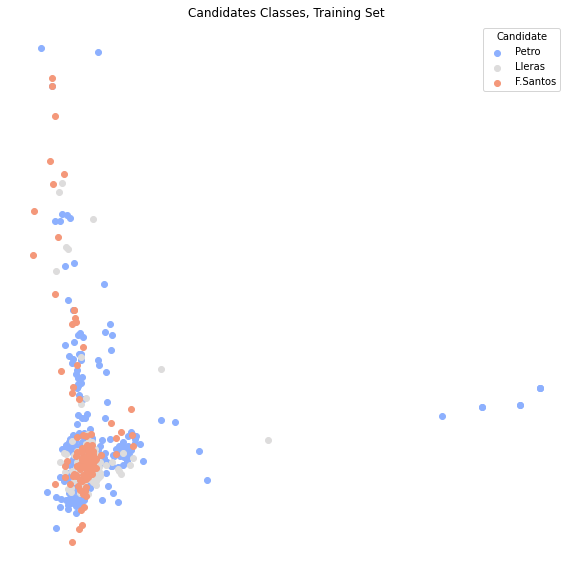

In [48]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 3)

#Plot Petro
a = np.stack(train_data[train_data['category']=="Gustavo Petro"]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "Petro")

#Plot Lleras
a = np.stack(train_data[train_data['category']=="Germán Vargas Lleras"]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Lleras")

#Plot F.Santos
a = np.stack(train_data[train_data['category']=="Pacho Santos"]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[2], label = "F.Santos")
    
ax.legend(loc = 'upper right', title = 'Candidate')
plt.title('Candidates Classes, Training Set')
plt.show()

### These candidates do not seem to be easily distinguishable.

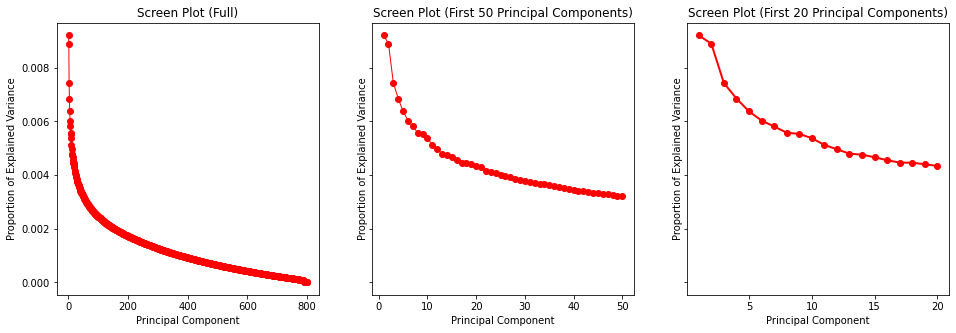

In [49]:
n = len(train_data)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Screen Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Screen Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Screen Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [50]:
train_data['pca_reduced_10'] = train_data['pca'].apply(lambda x: x[:10])

### Logistic:

In [51]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data['pca_reduced_10'], axis=0), train_data['category'])

LogisticRegression()

In [52]:
logistic.score(np.stack(train_data['pca_reduced_10'], axis=0), train_data['category'])

0.66

In [53]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_data['text'])
test_data['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data['vect'], axis=0))
test_data['pca'] = [r for r in reduced_data_test]
test_data['pca_reduced_10'] = test_data['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data['pca_reduced_10'], axis=0), test_data['category'])

0.655

In [54]:
# Overfitting

train_data['pca_reduced_400'] = train_data['pca'].apply(lambda x: x[:400])
test_data['pca_reduced_400'] = test_data['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data['pca_reduced_400'], axis=0), train_data['category'])

print("Training:")
print(logistic.score(np.stack(train_data['pca_reduced_400'], axis=0), train_data['category']))
print("Testing:")
print(logistic.score(np.stack(test_data['pca_reduced_400'], axis=0), test_data['category']))

Training:
0.84
Testing:
0.69


### Naive Bayes

In [55]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data['vect'], axis=0), train_data['category'])

BernoulliNB()

In [56]:
print("Training:")
print(naiveBayes.score(np.stack(train_data['vect'], axis=0), train_data['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data['vect'], axis=0), test_data['category']))

Training:
0.88
Testing:
0.715


In [57]:
test_data['nb_predict'] = naiveBayes.predict(np.stack(test_data['vect'], axis=0))
test_data['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data['vect'], axis=0))[:,0] #other is prop false

In [58]:
# Precision

sklearn.metrics.precision_score(test_data['category'], test_data['nb_predict'], average='weighted')

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6136834687448185

In [59]:
# Recall

sklearn.metrics.recall_score(test_data['category'], test_data['nb_predict'], average='weighted')

0.715

In [60]:
# F1_score

sklearn.metrics.f1_score(test_data['category'], test_data['nb_predict'], average='weighted')

0.6434941837144003

## <span style="color:red">*Exercise 3: Desicion Trees and Random Forest Classification*</span>

In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [61]:
# Creating new training and testing sets
holdBackFraction = .2
train_data, test_data = lucem_illud.trainTestSplit(df_clean, holdBackFraction=holdBackFraction)

In [62]:
# Vectorizing the text
## training data
TFVectorizer3 = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, norm='l2')
TFVects3 = TFVectorizer3.fit_transform(train_data['text'])
train_data['vect'] = [np.array(v).flatten() for v in TFVects3.todense()]

## testing data
TFVects3 = TFVectorizer3.fit_transform(test_data['text'])
test_data['vect'] = [np.array(v).flatten() for v in TFVects3.todense()]

In [63]:
# Creating the tree
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_data['vect'], axis =0), train_data['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


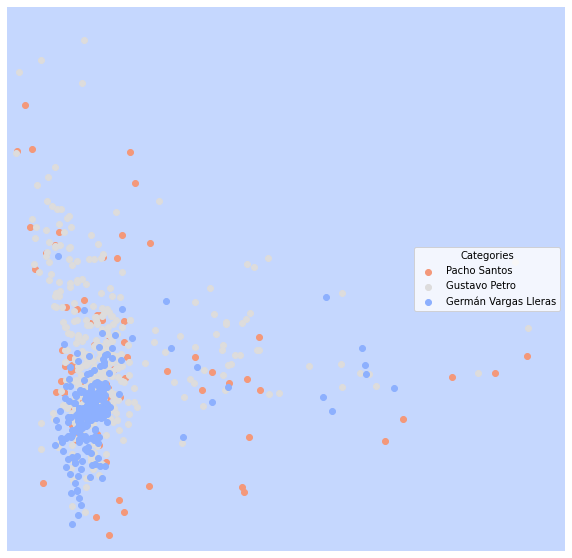

In [64]:
# Visualize
lucem_illud.plotregions(clf_tree, train_data)

In [65]:
lucem_illud.evaluateClassifier(clf_tree, train_data)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Pacho Santos,0.135,0.522124,1.000000,0.179248,0.044248
Gustavo Petro,0.370,0.564706,0.608466,0.608466,1.000000
Germán Vargas Lleras,0.235,0.585903,1.000000,0.406806,0.171806


### Very bad average and recall for Vargas Lleras and Pacho Santos. In fact, the three is classigying everything as one of the candidates. I wonder why.

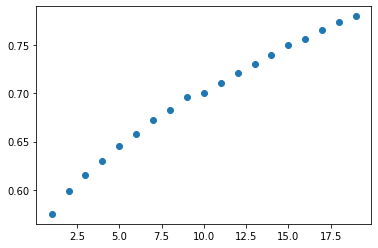

In [66]:
# Trimming the tree

depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data['vect'], axis =0), train_data['category'])
    score = sklearn.metrics.accuracy_score(train_data['category'], 
                                           tree2.predict(np.stack(train_data['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

### The acuracy does not seem to increase significantly, no matter how many layers the tree has. Each layer increases precision in about 0.025.

In [67]:
# Ramdom Forest

tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [68]:
bag.fit(np.stack(train_data['vect'], axis =0), train_data['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=0.8, n_estimators=100, random_state=1)

#### There is a problem with the size of the vector in the training vs the testing data. Not sure why.

## <span style="color:red">*Exercise 4: K-nearest Neighbor Classification*</span>

In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [69]:
# I'll use the train and test from the previous excercise

n_neighbors = 4
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [70]:
# I won't use the stopwords parameter bc it can't acommodate Spanish.
# Instead, I'll use the max_df parameter that detect and filter stop words based on intra corpus document frequency of terms.

TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_data['text'])
train_data['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [71]:

clf_knearest.fit(np.stack(train_data['vect'], axis = 0), train_data['category'])


KNeighborsClassifier(n_neighbors=4)

In [72]:
lucem_illud.evaluateClassifier(clf_knearest, train_data)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Pacho Santos,0.09375,0.668142,1.000000,0.430033,0.336283
Gustavo Petro,0.13875,0.859015,0.883516,0.844617,0.873913
Germán Vargas Lleras,0.10000,0.930192,0.739414,0.739414,1.000000


In [73]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_data['text'])
test_data['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_data['nb_predict'] = clf_knearest.predict(np.stack(test_data['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_data['vect'], axis=0), test_data['category']))

Testing score:
0.635


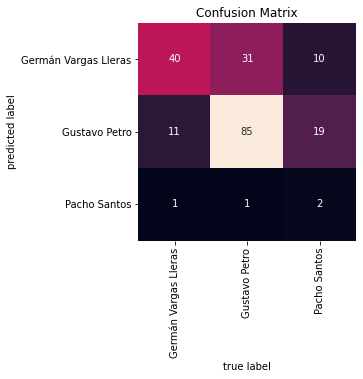

In [74]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_data)

### It does a terrible job.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


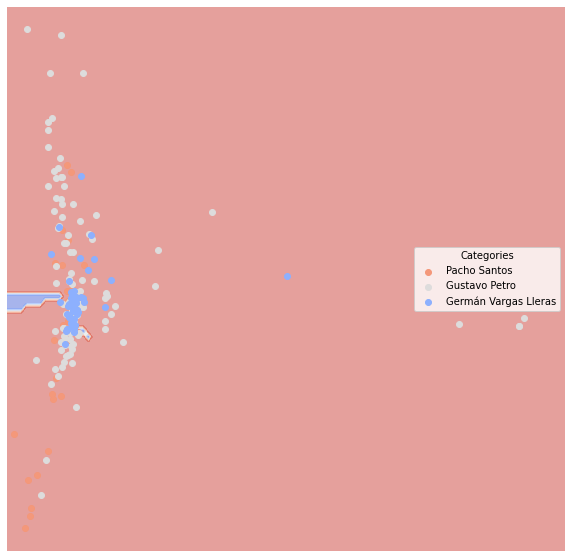

In [75]:
lucem_illud.plotregions(clf_knearest, test_data)

## <span style="color:red">*Exercise 5: Neural Net Classification*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [76]:
clf_nn = sklearn.neural_network.MLPClassifier()

In [77]:
clf_nn.fit(np.stack(train_data['vect'], axis=0), train_data['category'])

MLPClassifier()

In [78]:
lucem_illud.evaluateClassifier(clf_nn, test_data)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Pacho Santos,0.145,0.677133,0.541667,0.317151,0.419355
Gustavo Petro,0.185,0.799866,0.812500,0.787222,0.888889
Germán Vargas Lleras,0.110,0.844595,0.812500,0.674375,0.750000


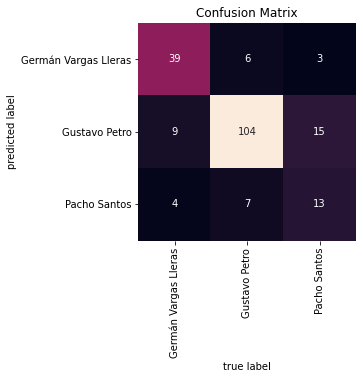

In [79]:
lucem_illud.plotConfusionMatrix(clf_nn, test_data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


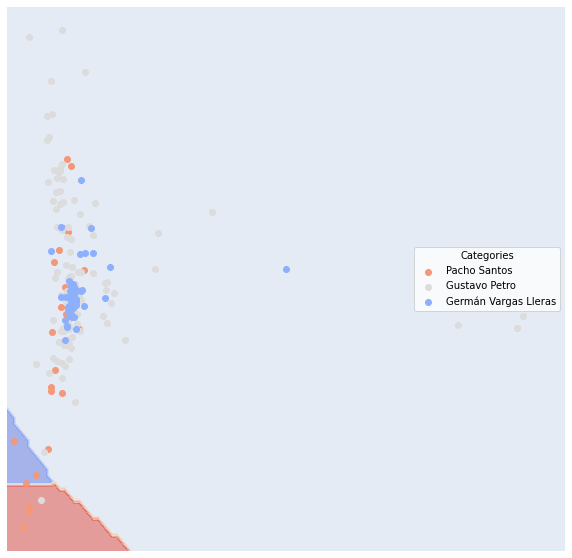

In [80]:
lucem_illud.plotregions(clf_nn, test_data)

### It is very interesting that the precision and recall for Gustavo Petro are the higherst. It supports the finding from week-2 that Petro has a distinctive way of expressing on Twiter. 